<a href="https://colab.research.google.com/github/KOWilliams/KOWilliams/blob/main/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset for detecting masks on faces. The dataset is located at https://www.kaggle.com/datasets/sanknn/facemask-detection

In [2]:
!pip install kaggle
# The command pip install kaggle
# is used to install the Kaggle Python package using the pip package manager

In [3]:
from google.colab import files
files.upload()
# This line of code is used to upload files from
# the local machine to the Colab environment.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kehindeoluwaseun","key":"34b8688e556df9e46dd1bf0ae96b6056"}'}

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# The set of code above are used to set up the Kaggle API key on my computer.
# The purpose of these commands is to create a directory named .kaggle
# in the home directory, we move the Kaggle API key file (kaggle.json) into
# that directory, and set the appropriate permissions to ensure that only
# the owner has read and write access to the API key file.
# This is done for security reasons to protect your Kaggle API credentials
# from unauthorized access. The Kaggle API key is used to authenticate and
# interact with the Kaggle platform programmatically.

In [6]:
!kaggle datasets download -d sanknn/facemask-detection

 99% 496M/501M [00:05<00:00, 99.3MB/s]
100% 501M/501M [00:05<00:00, 101MB/s] 


In [7]:
!unzip facemask-detection -d facemask-detection

Streaming output truncated to the last 5000 lines.
  inflating: facemask-detection/Facemaskdetection/train/Without_mask/augmented_1344_1873401.png  
  inflating: facemask-detection/Facemaskdetection/train/Without_mask/augmented_1345_1716050.png  
  inflating: facemask-detection/Facemaskdetection/train/Without_mask/augmented_1346_9262995.png  
  inflating: facemask-detection/Facemaskdetection/train/Without_mask/augmented_1347_2351946.png  
  inflating: facemask-detection/Facemaskdetection/train/Without_mask/augmented_1348_5252517.png  
  inflating: facemask-detection/Facemaskdetection/train/Without_mask/augmented_1349_7973583.png  
  inflating: facemask-detection/Facemaskdetection/train/Without_mask/augmented_134_2881434.png  
  inflating: facemask-detection/Facemaskdetection/train/Without_mask/augmented_1350_6253966.png  
  inflating: facemask-detection/Facemaskdetection/train/Without_mask/augmented_1351_5182308.png  
  inflating: facemask-detection/Facemaskdetection/train/Without_mask

In [8]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
import os
# the code imports essential libraries for data analysis (pandas, numpy),
# file and directory manipulation (glob, os), and image processing (cv2).
# These libraries are commonly used in tasks related to data science,
# machine learning, and computer vision.
# Definition of the paths to the With Mask / Without Mask Classification Dataset image folders (With and Without Mask)
With_mask_folder = '/content/facemask-detection/Facemaskdetection/val/With_mask'
Without_mask_folder = '/content/facemask-detection/Facemaskdetection/val/Without_mask'
# We are initializing the lists to store images and labels
images = []
labels = []
# We Load and pre-process Face With Mask Classification Dataset images (With Mask)
for filename in os.listdir(With_mask_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(With_mask_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(0)  # 0 represents With Mask
# We Load and pre-process Face Without Mask Classification Dataset images (Without Mask)
for filename in os.listdir(Without_mask_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(Without_mask_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(0)  # 1 represents Without Mask
# We Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [9]:
from sklearn.model_selection import train_test_split

# We are Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [10]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Assuming we have already loaded and pre-processed data
# (x_train, y_train, x_test, y_test)

# Definition of the model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')])  # 2 classes: Face With Mask and Face Without Mask

# Compilation of the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training of the model
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/30
21/21 [==============================] - 17s 711ms/step - loss: 2.5232 - accuracy: 0.9508 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
21/21 [==============================] - 15s 701ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
21/21 [==============================] - 15s 724ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
21/21 [==============================] - 16s 771ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/30
21/21 [==============================] - 14s 691ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/30
21/21 [==============================] - 15s 741ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
21/21 [==============================] - 15s 701ms/step - loss: 0.0000e+00 - accuracy: 

In [11]:
#1 Predicting on a single image
sample_image = x_test[3]  # Here we replace with our image data
predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(predictions)
# Here we interpret the label using our dataset's class labels (0 With Mask and 1 Without_ mask)
class_labels = ['With_mask', 'Without_mask']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 120ms/step
Predicted class: With_mask


In [12]:
from PIL import Image
import numpy as np

# Load the new image
new_image_path = '/content/facemask-detection/Facemaskdetection/val/With_mask/11111.png'
# Replace with the actual path to your new image
new_image = Image.open(new_image_path)

# Resize the image to match the input size expected by your model
input_size = (128, 128)  # Adjust this size based on your model's input size
new_image = new_image.resize(input_size)

# Convert the PIL image to a NumPy array and normalize pixel values if needed
new_image_array = np.array(new_image) / 255.0

# Making predictions on the new image
predictions = model.predict(np.expand_dims(new_image_array, axis=0))
predicted_label = np.argmax(predictions)

# Interpret the label using your dataset's class labels
class_labels = ['With_mask', 'Without_mask']
predicted_class = class_labels[predicted_label]

# Display the prediction
print(f'Predicted class: {predicted_class}')

# Close the image
new_image.close()


1/1 [==============================] - 0s 85ms/step
Predicted class: With_mask


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 64)                3

6/6 [==============================] - 1s 221ms/step


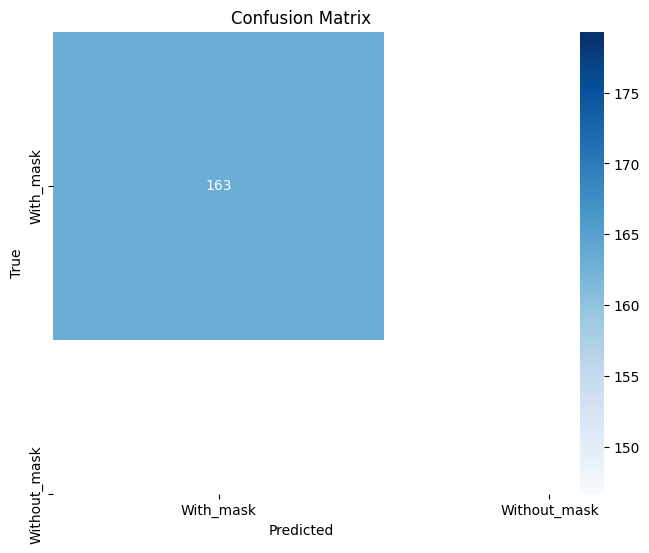

              precision    recall  f1-score   support

   With_mask       1.00      1.00      1.00       163

    accuracy                           1.00       163
   macro avg       1.00      1.00      1.00       163
weighted avg       1.00      1.00      1.00       163



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 1, does not match size of target_names, 2
  warnings.warn(


In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

# Assuming 'model' is your trained model
# 'x_test' contains the test set samples
# 'y_test' contains the true labels of the test set

# Get predicted probabilities from the model
predicted_probabilities = model.predict(x_test)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Get unique labels dynamically
unique_labels = np.unique(np.concatenate((y_test, predicted_labels)))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels, labels=unique_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
class_report = classification_report(y_test, predicted_labels, labels=unique_labels, target_names=class_names)
print(class_report)



